In [1]:
from cobaya.yaml import yaml_load_file

info_from_yaml = yaml_load_file("test.yaml")

In [2]:
from cobaya.run import run

updated_info, sampler = run(info_from_yaml)

#from cobaya.samplers.mcmc import plot_progress
# Assuming chain saved at `chains/gaussian`
#plot_progress("chains/simple", fig_args={"figsize": (6,4)})
#import matplotlib.pyplot as plt
#plt.tight_layout()
#plt.show()

[output] Output to be read-from/written-into folder 'chains', with prefix 'simple'
[classy] Importing *local* classy from /home/davidvng/cosmology/modules/code/classy
[planck_2018_lowl.tt] Importing clik from /home/davidvng/cosmology/modules/code/planck
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {planck_2018_lowl.TT: 1290.0, classy: 0.0671}
[mcmc] Dragging with number of interpolating steps:
[mcmc] *  1 : [['omega_b']]
[mcmc] * 45 : [['A_planck']]
[autoselect_covmat] *WARNING* WARNING: >1 possible best covmats: ['base_CleanedCamSpecHM_TT_lowE_lowl.covmat', 'base_CleanedCamSpecHM_TT_lowl_lowE.covmat']
[mcmc] Covariance matrix selected automatically: {packages_path}/data/planck_supp_data_and_covmats/covmats/base_CleanedCamSpecHM_TT_lowl_lowE.covmat
[mcmc] Covariance matrix loaded for params ['omega_b', 'A_planck']
[mcmc] All parameters' covariance loaded from given covm

TypeError: plot_progress() got an unexpected keyword argument 'fig_args'

Mean:
[0.03054306 1.00046144]
Covariance matrix:
[[3.63405449e-05 5.21741822e-07]
 [5.21741822e-07 6.73344946e-06]]


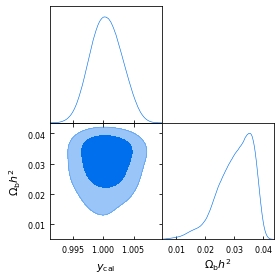

In [4]:
# Export the results to GetDist
from getdist.mcsamples import loadMCSamples
# Notice loadMCSamples requires a *full path*
import os

gd_sample = loadMCSamples(os.path.abspath(info_from_yaml["output"]))
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
#%matplotlib inline
import matplotlib.backends.backend_qt5agg
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["A_planck", "omega_b"], filled=True)

68% C.L.


(1, 1)

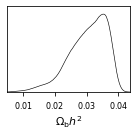

In [11]:
print("68% C.L.")
gdplot = gdplt.get_subplot_plotter()
gdplot.plots_1d(gd_sample, ["omega_b"])